Ex 1. Fit the sigmoid curve and calculate decision boundary using given dataset

[-9.830578   1.5369736]


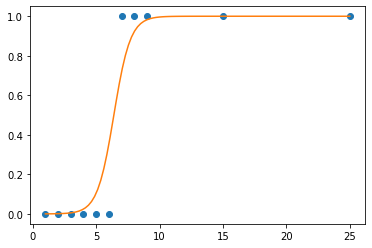

In [4]:
# a cheat sheet:
# in an optimization loop
# first calculate hypothesis for each datapoint x in X: h = 1 / (1 + exp(-theta0-theta1*x))
# then calculate crossentropy: -y*log(h) - (1-y)*log(1-h)
# and cost: sum(crossentropy) / len(x)
# next calculate derivatives for theta 0 and theta1 (similar to those in linear regression)
# theta0_deriv = sum(h - y) / len(y), theta1_deriv = sum((h-y)*X)
# and then update theta weights
# theta = theta - lr*theta_deriv

# check if cost is getting lower through iterations
# if not, try to modify the learning rate

# calculating decision boundary might look like this:
# theta[0] + theta[1]*x = 0
# theta[1]*x = -theta[0]
# x = -theta[0]/theta[1]

from matplotlib import pyplot as plt
import numpy as np

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

# optimization loop

max_iter = 10000
eps = 0.00001
prev_cost = 99
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta[0] - theta[1]*X))

    crossentropy = -y*np.log(h_x + 0.00001) - (1-y)*np.log(1-h_x + 0.00001)
    cost = sum(crossentropy) / len(y)

    theta0_deriv = sum(h_x-y)/len(y)
    theta1_deriv = sum((h_x-y) * X) / len(y)

    alpha = 0.1

    theta[0] = theta[0] - alpha*theta0_deriv
    theta[1] = theta[1] - alpha*theta1_deriv

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

print(theta)

x_samples = np.linspace(min(X), max(X), 100)
y_samples = 1 / (1 + np.exp(-theta[0] - theta[1]*x_samples))

plt.plot(X, y, 'o')
plt.plot(x_samples, y_samples, '-')
plt.show()

Ex 2.

[[-2.37272547]
 [ 1.17270134]
 [-2.41199288]]


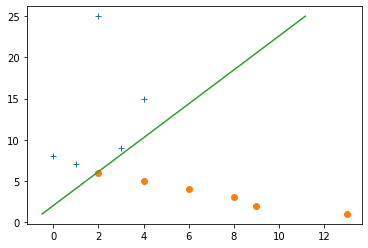

In [5]:
# generalize optimization code for X being a matrix, where its rows are features and columns are examples
# code should work independently from number of features and number of examples
# use matrix multiplication (np.matmul or @)
# plot decision boundary on a plot x2(x1)
# calculating decision boundary might look like this:
# theta0 + theta1*x1 + theta2*x2 = 0
# theta2*x2 = -theta0 - theta1*x1
# x2 = -theta0/theta2 - theta1/theta2 * x1

from matplotlib import pyplot as plt
import numpy as np

X = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1,  1,  1], # bias' 'variables' already appended to X
              [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3,  4,  2]], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

y.shape = [1, len(y)]

theta = np.zeros((X.shape[0], 1))

max_iter = 10000
eps = 0.00001
alpha = 0.05
prev_cost = 99

for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X))

    crossentropy = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    [cost] = np.sum(crossentropy, axis=1) / X.shape[1]

    theta_derivs = sum((h_x-y) @ X.T) / X.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]

    theta = theta - alpha*theta_derivs

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

print(theta)

x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

X_positive = X[:, y[0, :] == 1]
X_negative = X[:, y[0, :] == 0]

plt.plot(X_positive[2, :], X_positive[1, :], '+')
plt.plot(X_negative[2, :], X_negative[1, :], 'o')
plt.plot(x2, x1, '-')
plt.show()

Ex 3. Using real data, optimize classifier to predict given values

[[-6.62800034]
 [ 5.366854  ]
 [ 5.09441908]]


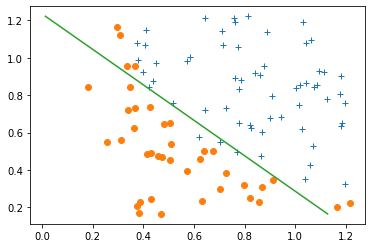

In [6]:
# split dataset into a training set and a test set
# train model on the training set
# calculate TP, FP, TN, FN on test set
# calculate sensitivity, specificity, positive predictivity and negative predictivity

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./data.txt')
data = data.values

# lets try to put data into X and y.
# we want X to be n+1 by m (n - number of features, m - number of examples)
# and y to be 1 by m

# data is 99x3, 99 - examples, first two columns - features, last column - labels

X = np.ones((data.shape[1], data.shape[0]))  # create X of size 3x99
X[1:3, :] = data[:, 0:2].T  # fill X's second and third row with features, leave first row with ones

y = data[:, 2:3].T  # copy third column to y as row

# we may want to normalize the dataset in order to converge faster
X[1, :] = (X[1, :] - np.std(X[1, :])) / np.mean(X[1, :])
X[2, :] = (X[2, :] - np.std(X[2, :])) / np.mean(X[2, :])

# rest is the same as in 2.
theta = np.zeros((X.shape[0], 1))

max_iter = 10000
eps = 0.00001
alpha = 0.05
prev_cost = 99

for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X))

    crossentropy = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    [cost] = np.sum(crossentropy, axis=1) / X.shape[1]

    theta_derivs = sum((h_x-y) @ X.T) / X.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]

    theta = theta - alpha*theta_derivs

#     print("epoch ", str(i+1), ", cost ", cost)

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

print(theta)

x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

X_positive = X[:, y[0, :] == 1]
X_negative = X[:, y[0, :] == 0]

plt.plot(X_positive[2, :], X_positive[1, :], '+')
plt.plot(X_negative[2, :], X_negative[1, :], 'o')
plt.plot(x2, x1, '-')
plt.show()
